In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from ast import literal_eval

# Load the data
df = pd.read_csv("labeled_data.csv")

# Function to convert string representation of a list into a list of floats
def string_to_float_list(s):
    try:
        return [float(item) for item in literal_eval(s)]
    except:
        return [float('nan')] * 10  # Adjust the number based on the expected list length

# Apply the conversion to the NDVI and NBR columns (if they are the ones with string lists)
df['NDVI'] = df['NDVI'].apply(string_to_float_list)
df['NBR'] = df['NBR'].apply(string_to_float_list)

# Function to find the maximum length of lists in a column
def find_max_list_length(df, column_name):
    max_length = 0
    for item in df[column_name]:
        max_length = max(max_length, len(item))
    return max_length

# Find the maximum length of the lists in the 'NBR' column
max_nbr_length = find_max_list_length(df, 'NBR')
print(max_nbr_length)

# Expand these lists into separate columns with a check to avoid IndexError
for i in range(max_nbr_length):
    df[f'NDVI_{i}'] = df['NDVI'].apply(lambda x: x[i] if i < len(x) else float('nan'))
    df[f'NBR_{i}'] = df['NBR'].apply(lambda x: x[i] if i < len(x) else float('nan'))


# Drop the original NDVI, NBR columns
df.drop(['NDVI', 'NBR'], axis=1, inplace=True)

# Drop columns that contain any NaN values
df.dropna(axis=1, inplace=True)

# Now apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Label', axis=1))  # Replace 'Target' with your actual target column name
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

from sklearn.model_selection import train_test_split

# Assuming 'Label' is your target variable
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Label'], test_size=0.20, random_state=42)

# Using KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# Predictions
pred = knn.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


1444


/var/folders/zk/gdbl783j40ldg_nb6j2467rh0000gn/T/ipykernel_44921/3835826082.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'NDVI_{i}'] = df['NDVI'].apply(lambda x: x[i] if i < len(x) else float('nan'))
/var/folders/zk/gdbl783j40ldg_nb6j2467rh0000gn/T/ipykernel_44921/3835826082.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'NBR_{i}'] = df['NBR'].apply(lambda x: x[i] if i < len(x) else float('nan'))
/var/folders/zk/gdbl783j40ldg_nb6j2467rh0000gn/T/ipykernel_44921/3835826082.py:35: PerformanceWarning: DataFrame

[[6 8 1 0]
 [4 9 2 0]
 [4 3 2 0]
 [1 3 1 0]]
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        15
           1       0.39      0.60      0.47        15
           2       0.33      0.22      0.27         9
           3       0.00      0.00      0.00         5

    accuracy                           0.39        44
   macro avg       0.28      0.31      0.29        44
weighted avg       0.34      0.39      0.35        44



/Users/lilllmeng/Library/Caches/pypoetry/virtualenvs/mine-seg-sat-xju_6twP-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lilllmeng/Library/Caches/pypoetry/virtualenvs/mine-seg-sat-xju_6twP-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lilllmeng/Library/Caches/pypoetry/virtualenvs/mine-seg-sat-xju_6twP-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in la

In [41]:
from sklearn.model_selection import GridSearchCV
# Fine-tuning the model using Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weig

In [8]:
from sklearn.inspection import permutation_importance

# Assume knn is your trained KNN model and X_test, y_test are your test data
result = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Get importances and their standard deviations
importances = result.importances_mean
std = result.importances_std

# Displaying feature importances
for feature, importance, std in zip(['NDVI', 'NBR'], importances, std):
    print(f"Feature: {feature}, Importance: {importance} ± {std}")


Feature: NDVI, Importance: 0.08787878787878789 ± 0.06394226620002785


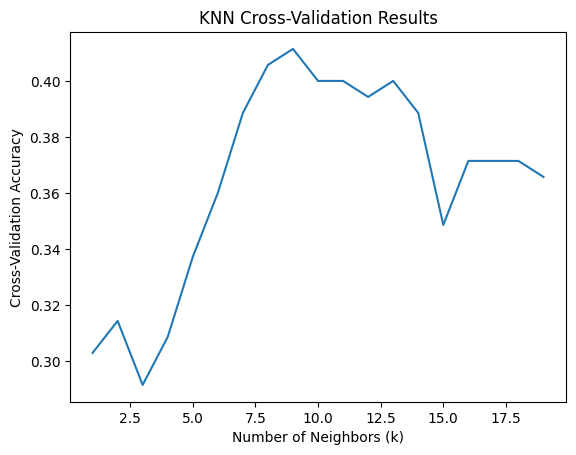

The optimal number of neighbors is 9


In [9]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Range of k values to test; ensuring k is less than the number of samples
k_values = range(1, min(20, len(X_train) - 1))

# List to store cross-validation scores
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=min(5, len(X_train)))
    cv_scores.append(scores.mean())

# Find the k value with the maximum score
optimal_k = k_values[cv_scores.index(max(cv_scores))]

# Plotting k values against cross-validation scores
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Cross-Validation Results')
plt.show()

print(f"The optimal number of neighbors is {optimal_k}")
